## 1. Dataset used:

you can see the data here:
2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE
https://github.com/CSSEGISandData/COVID-19


This Data Analysis by: Sarah Alshehri

## 2. Data Wrangling:
### <li>Data Gathering:</li>

In [1]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
import seaborn as sb
%matplotlib inline


ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [2]:
#Loading Dataset 
conf_data = pd.read_csv('time_series_covid19_confirmed_global.csv')

In [3]:
conf_data.sample(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20
34,NaN,Cameroon,3.8480,11.5021,0,0,0,0,0,0,...,10,10,13,20,27,40,56,66,75,75
171,NaN,Nicaragua,12.8654,-85.2072,0,0,0,0,0,0,...,0,0,1,1,2,2,2,2,2,2
156,NaN,Mauritania,21.0079,10.9408,0,0,0,0,0,0,...,1,1,2,2,2,2,2,2,2,3
168,Sint Maarten,Netherlands,18.0425,-63.0548,0,0,0,0,0,0,...,0,0,0,1,1,1,2,2,3,3
183,NaN,Poland,51.9194,19.1451,0,0,0,0,0,0,...,238,251,355,425,536,634,749,901,1051,1221


### <li>Data Assessment:</li>

In [4]:
conf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 69 columns):
Province/State    76 non-null object
Country/Region    248 non-null object
Lat               248 non-null float64
Long              248 non-null float64
1/22/20           248 non-null int64
1/23/20           248 non-null int64
1/24/20           248 non-null int64
1/25/20           248 non-null int64
1/26/20           248 non-null int64
1/27/20           248 non-null int64
1/28/20           248 non-null int64
1/29/20           248 non-null int64
1/30/20           248 non-null int64
1/31/20           248 non-null int64
2/1/20            248 non-null int64
2/2/20            248 non-null int64
2/3/20            248 non-null int64
2/4/20            248 non-null int64
2/5/20            248 non-null int64
2/6/20            248 non-null int64
2/7/20            248 non-null int64
2/8/20            248 non-null int64
2/9/20            248 non-null int64
2/10/20           248 non-null int64
2/

In [5]:
conf_data.isnull().sum()

Province/State    172
Country/Region      0
Lat                 0
Long                0
1/22/20             0
1/23/20             0
1/24/20             0
1/25/20             0
1/26/20             0
1/27/20             0
1/28/20             0
1/29/20             0
1/30/20             0
1/31/20             0
2/1/20              0
2/2/20              0
2/3/20              0
2/4/20              0
2/5/20              0
2/6/20              0
2/7/20              0
2/8/20              0
2/9/20              0
2/10/20             0
2/11/20             0
2/12/20             0
2/13/20             0
2/14/20             0
2/15/20             0
2/16/20             0
                 ... 
2/26/20             0
2/27/20             0
2/28/20             0
2/29/20             0
3/1/20              0
3/2/20              0
3/3/20              0
3/4/20              0
3/5/20              0
3/6/20              0
3/7/20              0
3/8/20              0
3/9/20              0
3/10/20             0
3/11/20   

In [6]:
conf_data.shape

(248, 69)

### <li>Cleaning Data:</li>

In [7]:
# take a copy for clean data
conf_data_clean = conf_data.copy()
#Rename Country/Regiont column
conf_data_clean = conf_data_clean.rename(columns ={'Country/Region':'Country_Region'})
conf_data_clean.head()

,Province/State,Country_Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,22,22,22,24,24,40,40,74,84,94
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,55,59,64,70,76,89,104,123,146,174
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,60,74,87,90,139,201,230,264,302,367
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,39,39,53,75,88,113,133,164,188,224
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,1,2,2,3,3,3,4


In [8]:
# Convert Country/Region column to Categorical 
conf_data_clean.Country_Region = conf_data_clean.Country_Region.astype('category')
conf_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 69 columns):
Province/State    76 non-null object
Country_Region    248 non-null category
Lat               248 non-null float64
Long              248 non-null float64
1/22/20           248 non-null int64
1/23/20           248 non-null int64
1/24/20           248 non-null int64
1/25/20           248 non-null int64
1/26/20           248 non-null int64
1/27/20           248 non-null int64
1/28/20           248 non-null int64
1/29/20           248 non-null int64
1/30/20           248 non-null int64
1/31/20           248 non-null int64
2/1/20            248 non-null int64
2/2/20            248 non-null int64
2/3/20            248 non-null int64
2/4/20            248 non-null int64
2/5/20            248 non-null int64
2/6/20            248 non-null int64
2/7/20            248 non-null int64
2/8/20            248 non-null int64
2/9/20            248 non-null int64
2/10/20           248 non-null int64


In [9]:
#Delete unnecessary column (Province/State)
conf_data_clean.drop(['Province/State','Lat','Long'],axis =1,inplace =True)
conf_data_clean.columns

Index(['Country_Region', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20',
       '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20',
       '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20',
       '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20',
       '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20',
       '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20',
       '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20',
       '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20',
       '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20',
       '3/24/20', '3/25/20', '3/26/20'],
      dtype='object')

In [10]:
conf_data_clean.shape

(248, 66)

In [11]:
conf_data_clean_date = conf_data_clean.iloc[:,4:]
conf_data_clean_date=conf_data_clean_date.sum()
conf_data_clean_date.shape

(62,)

In [12]:
conf_data_clean_date.index = pd.to_datetime(conf_data_clean_date.index)
conf_data_clean_date.head()

2020-01-25    1434
2020-01-26    2118
2020-01-27    2927
2020-01-28    5578
2020-01-29    6166
dtype: int64

In [13]:
conf_data_clean_date.tail()

2020-03-22    336953
2020-03-23    378235
2020-03-24    418045
2020-03-25    467653
2020-03-26    529591
dtype: int64

## 3. Exploratory Data Analysis (EDA):

<b>Storing cleaned dataset:</b>

In [14]:
conf_data_clean.to_csv('time_series_covid19_confirmed_global_clean.csv',encoding='utf-8', index=False)

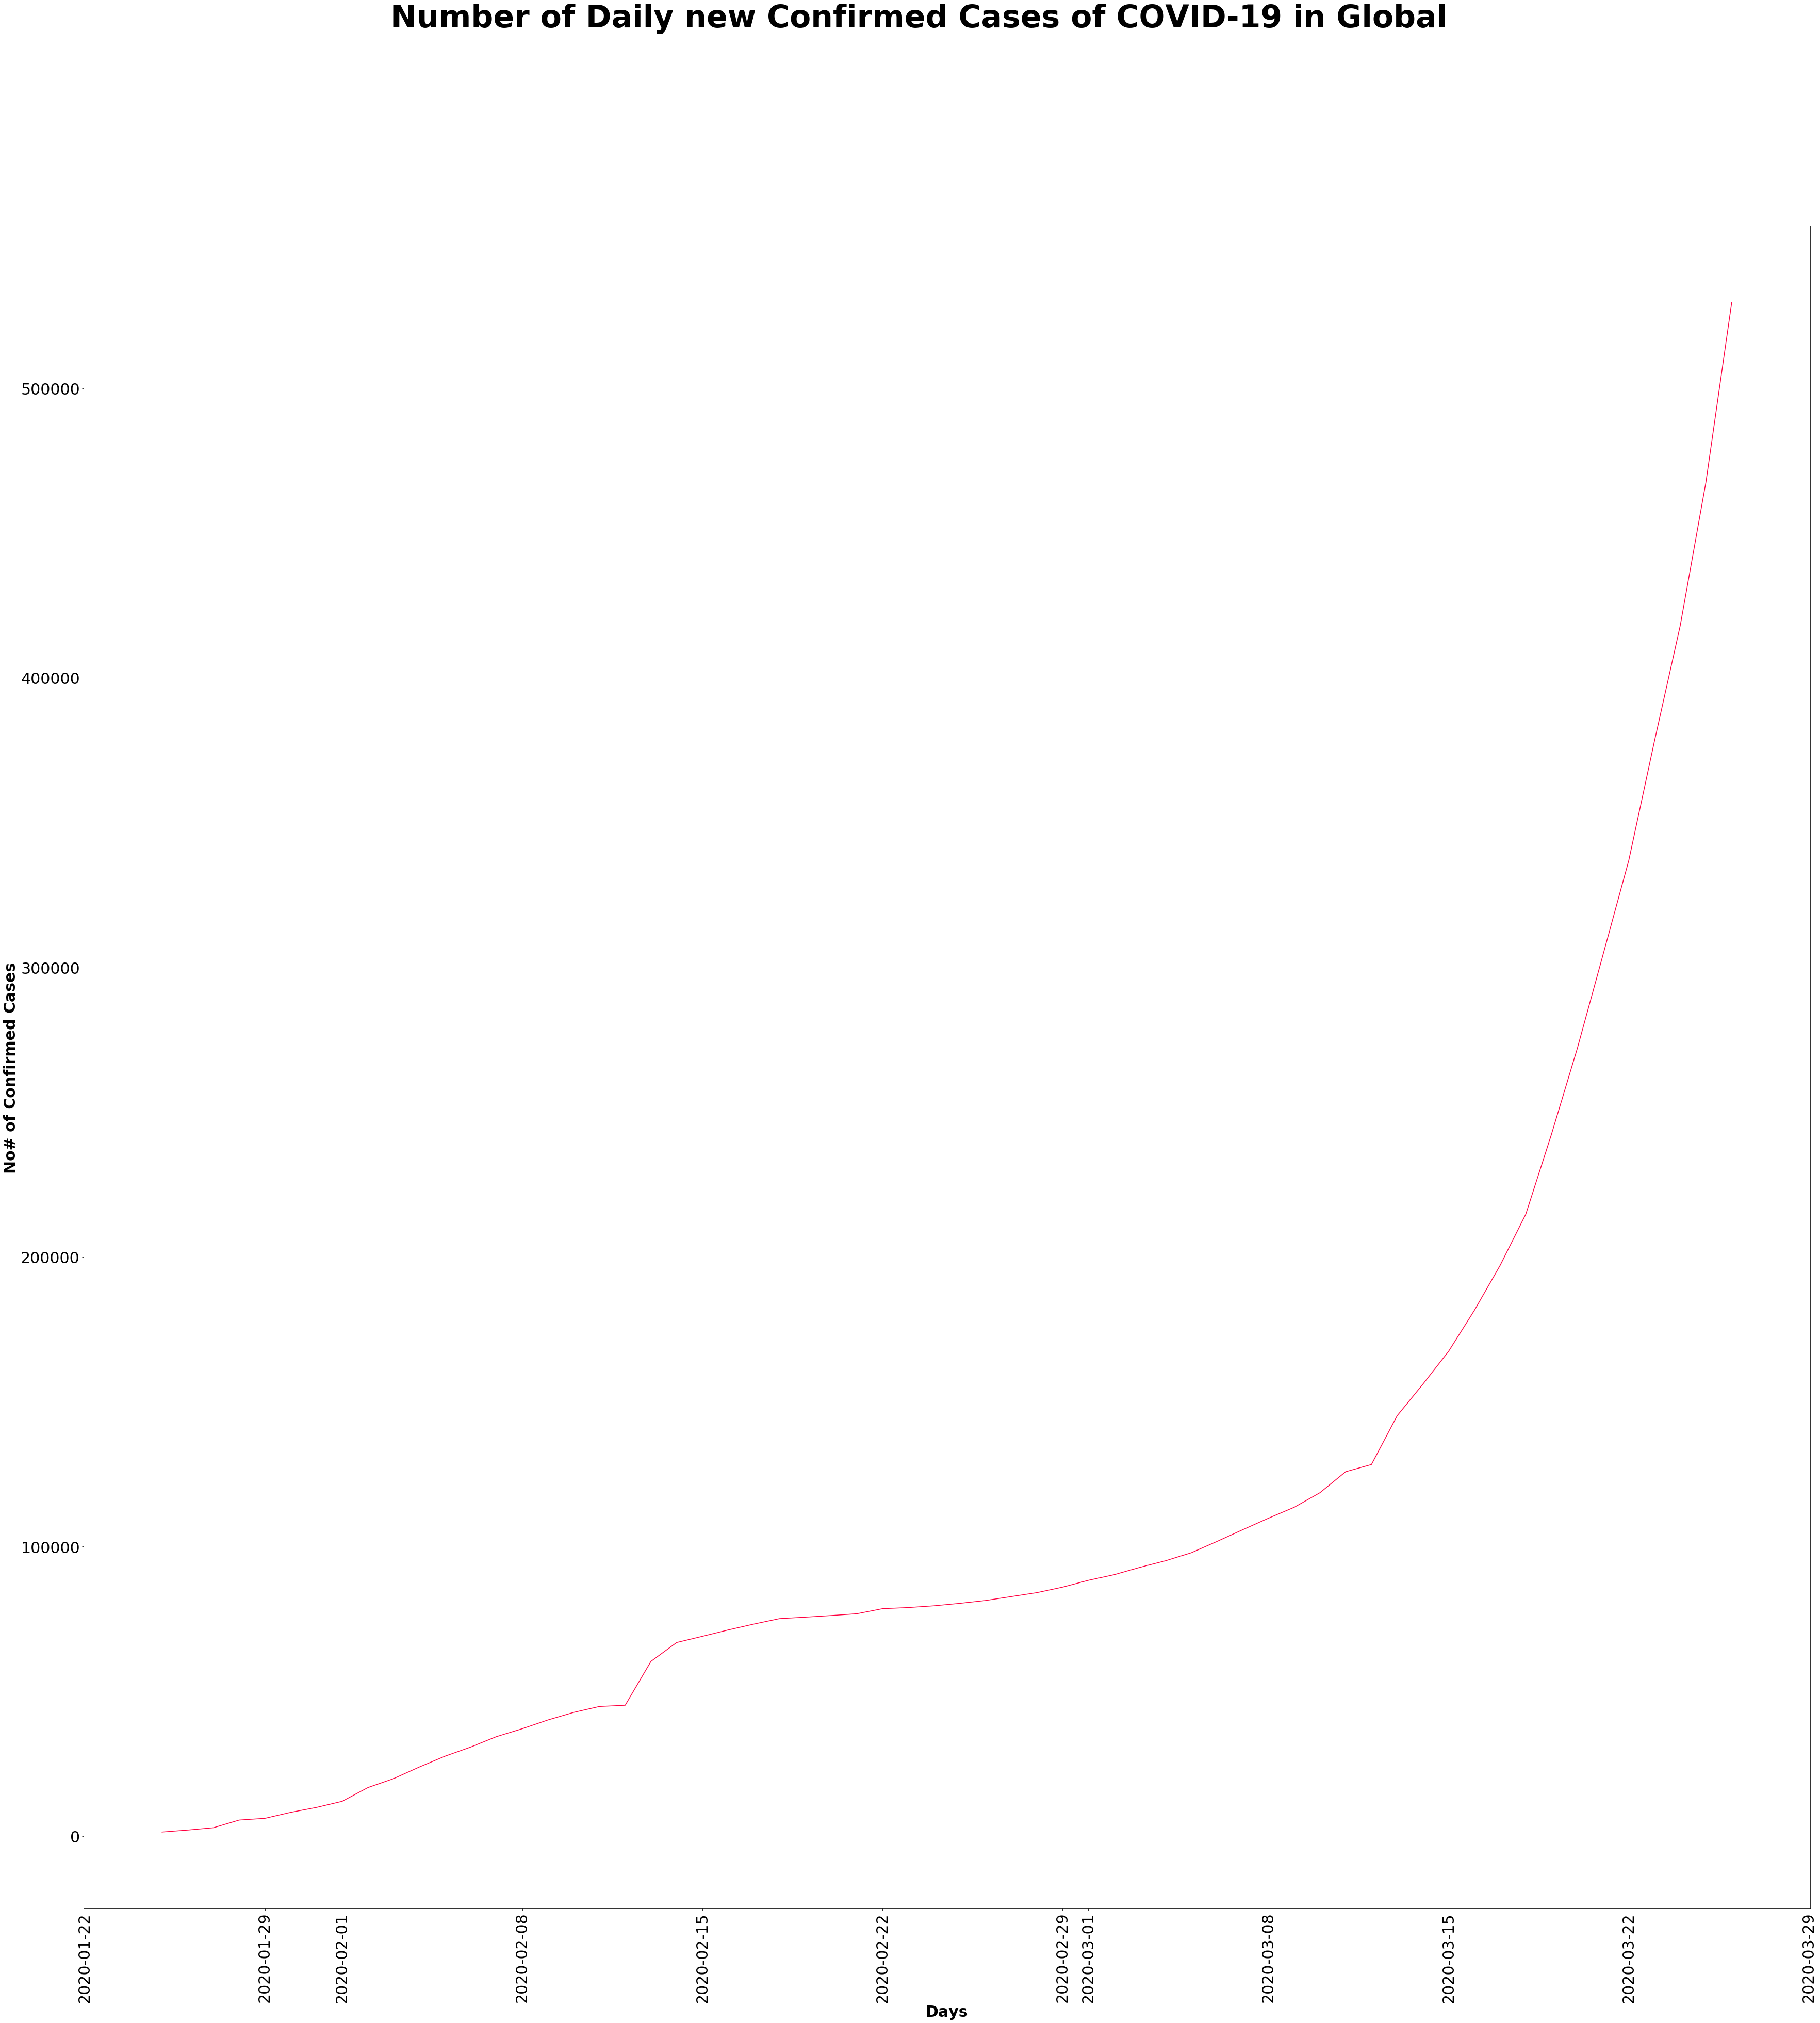

In [15]:
plt.figure(figsize = [60,60])
plt.plot(conf_data_clean_date,color = '#FF0040');
plt.xticks(size = 30,rotation=90);
plt.yticks(size = 30);
plt.xlabel('Days',size = 30,fontweight='bold');
plt.ylabel('No# of Confirmed Cases',size = 30,fontweight='bold');
plt.suptitle('Number of Daily new Confirmed Cases of COVID-19 in Global', fontsize=60, fontweight='bold');

In [16]:
conf_data_clean_date.describe()

count        62.000000
mean     112713.854839
std      115152.295581
min        1434.000000
25%       40803.000000
50%       79983.500000
75%      124061.250000
max      529591.000000
dtype: float64

It can be seen from the previous plot that the confirmed Cases mean is  112713.86 cases 

## 4. Using PROPHET for forcasting COVID-19 data:

In [17]:
#using PROPHET for forcasting COVID-19 
conf_data_clean_date = conf_data_clean_date.reset_index()
conf_data_clean_date.columns = ['ds','y']
conf_data_clean_date['ds'] = pd.to_datetime(conf_data_clean_date['ds'])

model = Prophet(interval_width=0.95)
model.fit(conf_data_clean_date)
future = model.make_future_dataframe(periods=30)
#future_confirmed = future.copy() # for non-baseline predictions later on
future.tail()


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/sarah/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds
87,2020-04-21
88,2020-04-22
89,2020-04-23
90,2020-04-24
91,2020-04-25


In [18]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
87,2020-04-21,1.107237e+06,9.838616e+05,1.235585e+06
88,2020-04-22,1.134084e+06,9.967586e+05,1.279518e+06
89,2020-04-23,1.164714e+06,1.015523e+06,1.308749e+06
90,2020-04-24,1.183642e+06,1.031925e+06,1.328274e+06
91,2020-04-25,1.208102e+06,1.043060e+06,1.357293e+06


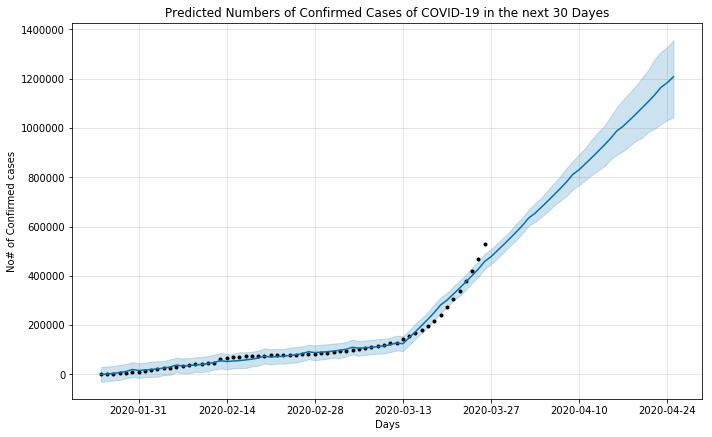

In [19]:
conf_plot1 = model.plot(forecast)
#plt.plot(color='red');
plt.title('Predicted Numbers of Confirmed Cases of COVID-19 in the next 30 Dayes');
plt.xlabel('Days');
plt.ylabel('No# of Confirmed cases');


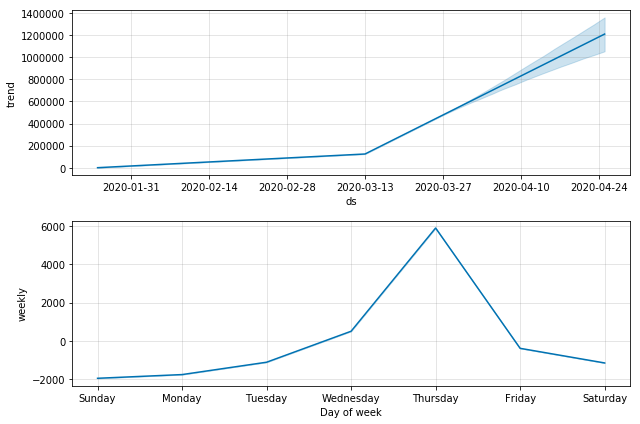

In [20]:
conf_plot2 = model.plot_components(forecast)

Resources:
- https://facebook.github.io/prophet/docs/quick_start.html
<br>
- https://towardsdatascience.com/forecasting-with-prophet-d50bbfe95f91
<br>
- https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-prophet-in-python-3